# K-nearst Neighbour (KNN)

## Introduction
The k-Nearest Neighbor (KNN) is `Supervised meachine algorithm `is a type of instance-based learning algorithm that relies on the principle of
distance.
KNN is a `non-parametric`, `lazy learning algorithm`. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real-world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory.

## Problem Statement
The problem statement is to predict whether a person will have diabetes or not based on the given features.

## Algorithm
The k-Nearest Neighbor (KNN) algorithm is a type of instance-based learning algorithm that relies on the principle of

distance metric: Euclidean, Manhattan, Minkowski, Hamming distance, etc.

In [1]:
# Example of KNN classfier on irsi daata using sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the datset 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# split the that X and Y 
X = df.drop('species', axis=1)
y = df['species']

In [5]:
# load and fit the KNN classfire on the data 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# predict the classfication
new_measuremnat = np.array([[5.1, 3.5, 1.4, 0.2]])
knn.predict(new_measuremnat)

c:\Users\HP\miniconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [6]:
# train test split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


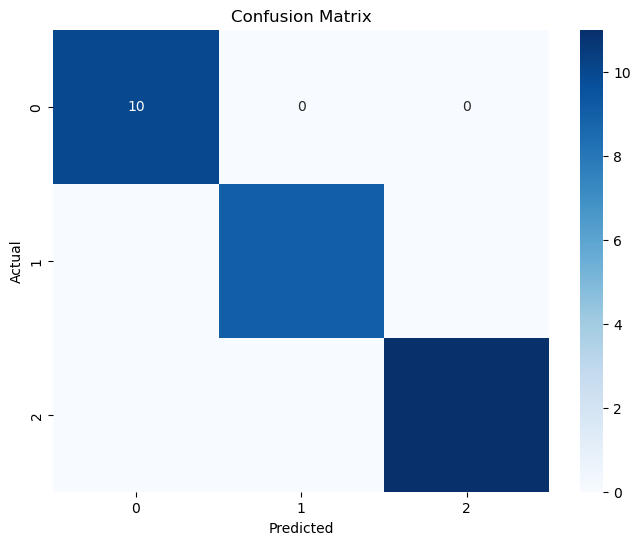

In [7]:
# fit model on the 
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
# Reggersion using on tips dataset 

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# split the data X and y 
X = df.drop('tip', axis=1)
y = df['tip']


In [10]:
# encode the categorical column using fr loop and le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category' :
        X[col] = le.fit_transform(X[col])



In [11]:
# train test split the data and run model 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = KNeighborsRegressor(n_neighbors=5,metric= 'minkowski' ,p=2)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
print(f"mean squared error : {mean_squared_error (y_test, y_pred)}")
print(f"r2 score : {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")



mean squared error : 0.8382265306122448
r2 score : 0.3294034029001649
RMSE: 0.9155471209130881


In [12]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [13]:
#predict a specific value 
model.predict([[10, 0, 1, 1, 0, 2]])

c:\Users\HP\miniconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.246])